# Анализ данных в спорте

## Домашнее задание 1. Анализ игры любимого футболиста на ЧМ2018 часть 2

### Общая информация

Дата выдачи: 14.11.2021

Дедлайн: 23:59MSK 01.12.2021

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов. В случае поздней сдачи максимальная оценка - 7 баллов

### Загрузка данных (если и менять тут код, то очень аккуратно)

In [ ]:
import requests
import pandas as pd
import numpy as np
from tqdm import tqdm
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [ ]:
base_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/"
comp_url = base_url + "matches/{}/{}.json"
match_url = base_url + "events/{}.json"

In [ ]:
def parse_data(competition_id, season_id):
    matches = requests.get(url=comp_url.format(competition_id, season_id)).json()
    match_ids = [m['match_id'] for m in matches]
    matches = [m for m in matches] 
    i = 0
    df = pd.DataFrame()
    for match_id in tqdm(match_ids):
        events = []
        for e in requests.get(url=match_url.format(match_id)).json():
            events.append(e)
        df = df.append(pd.json_normalize(events, sep='_').assign(match_id = match_id))
    return df, pd.json_normalize(matches, sep='_')

In [ ]:
competition_id = 43
season_id = 3
df, df_matches = parse_data(competition_id, season_id)

100%|██████████| 64/64 [03:07<00:00,  2.92s/it]


In [ ]:
df

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,...,goalkeeper_end_location,injury_stoppage_in_chain,foul_won_advantage,foul_committed_advantage,dribble_overrun,pass_backheel,shot_one_on_one,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,pass_cut_back,foul_committed_type_id,foul_committed_type_name,foul_won_defensive,dribble_nutmeg,shot_aerial_won,pass_goal_assist,foul_committed_card_id,foul_committed_card_name,match_id,clearance_aerial_won,pass_deflected,block_deflection,ball_recovery_offensive,shot_deflected,foul_committed_offensive,pass_miscommunication,pass_through_ball,pass_technique_id,pass_technique_name,shot_redirect,bad_behaviour_card_id,bad_behaviour_card_name,miscontrol_aerial_won,block_save_block,shot_open_goal,foul_committed_penalty,foul_won_penalty,shot_follows_dribble
0,07d17f3a-9ecc-4083-84c5-86022360a422,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,774,Egypt,1,Regular Play,774,Egypt,451.0,"[{'player': {'id': 5265, 'name': 'Mohamed El S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,d546e5cd-ff15-47f6-b581-521fffb9e420,2,1,00:00:00.000,0,0,1,0.000,35,Starting XI,774,Egypt,1,Regular Play,783,Uruguay,442.0,"[{'player': {'id': 5267, 'name': 'Néstor Ferna...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b5e89bb7-9ced-4968-bc86-9dc7b94d3710,3,1,00:00:00.000,0,0,1,NaN,18,Half Start,774,Egypt,1,Regular Play,774,Egypt,NaN,NaN,[667461fe-a1a2-45ba-a60f-b4b6f0d7d5c1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,667461fe-a1a2-45ba-a60f-b4b6f0d7d5c1,4,1,00:00:00.000,0,0,1,9.975,18,Half Start,774,Egypt,1,Regular Play,783,Uruguay,NaN,NaN,[b5e89bb7-9ced-4968-bc86-9dc7b94d3710],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,490a99e5-f721-49c2-ba3b-19a3dd7e0a5f,5,1,00:00:00.507,0,0,2,1.920,30,Pass,783,Uruguay,9,From Kick Off,783,Uruguay,NaN,NaN,[dd300c89-21e5-4163-8de8-d77946ca0156],"[61.0, 41.0]",4319.0,Edinson Roberto Cavani Gómez,24.0,Left Center Forward,5259.0,José María Giménez de Vargas,33.105892,2.704966,1.0,Ground Pass,"[31.0, 55.0]",38.0,Left Foot,65.0,Kick Off,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827,813ff773-0e7e-4a11-b934-282e3d18b2e0,3828,2,00:49:06.053,94,6,168,NaN,23,Goal K

In [ ]:
df_players = df.drop_duplicates(subset = ['player_name', 'team_name'])[['player_name', 'team_name']].dropna()

In [ ]:
df_players.query('team_name == "Uruguay"')
#https://www.youtube.com/watch?v=UfuWvgaAjQQ

,player_name,team_name
4,Edinson Roberto Cavani Gómez,Uruguay
5,José María Giménez de Vargas,Uruguay
8,Nahitan Michel Nández Acosta,Uruguay
10,Matías Vecino Falero,Uruguay
13,Guillermo Varela Olivera,Uruguay
20,Diego Roberto Godín Leal,Uruguay
30,Rodrigo Bentancur Colmán,Uruguay
33,Giorgian Daniel De Arrascaeta Benedetti,Uruguay
40,José Martín Cáceres Silva,Uruguay
93,Luis Alberto Suárez Díaz,Uruguay


In [ ]:
location_columns = [x for x in df.columns.values if 'location' in x]
for col in location_columns:
    for i, dimension in enumerate(["x", "y"]):
        new_col = col.replace("location", dimension)
        df[new_col] = df.apply(lambda x: x[col][i] if type(x[col]) == list else None, axis=1)

In [ ]:
df = df[[c for c in df.columns if c not in location_columns]]

In [ ]:
df.columns.values

In [ ]:
df[df['player_name']=='Edinson Roberto Cavani Gómez'].type_name.unique()

## Тут начинается ваша работа

* Сделаем копию таблицы, чтобы в случае разрушения таблицы df можно было её восстановить более быстрым спосбом, то есть копированием оригинала вместо скачивания и обработки данных заново

In [ ]:
df_original = df.copy()

In [ ]:
# df = df_original.copy() # для восстановления испорченого df

Для начала нужно выбрать игрока, которого вы хотите изучить, выбирать нужно из игроков атаки или полузащиты, которые сыграли минимум 5 матчей. 
(чтобы узнать позицию игрока можно вольспозоваться википедией или колонкой position_name)

* Посмотрим на роли игроков, а затем на имена игроков интересующей нас роли

In [ ]:
# различные позиции игроков
set(df['position_name'])

{'Center Attacking Midfield',
 'Center Back',
 'Center Defensive Midfield',
 'Center Forward',
 'Center Midfield',
 'Goalkeeper',
 'Left Attacking Midfield',
 'Left Back',
 'Left Center Back',
 'Left Center Forward',
 'Left Center Midfield',
 'Left Defensive Midfield',
 'Left Midfield',
 'Left Wing',
 'Left Wing Back',
 'Right Attacking Midfield',
 'Right Back',
 'Right Center Back',
 'Right Center Forward',
 'Right Center Midfield',
 'Right Defensive Midfield',
 'Right Midfield',
 'Right Wing',
 'Right Wing Back',
 'Secondary Striker',
 nan}

* Посмотрим на имена игроков позиции CAM

In [ ]:
set(df[df['position_name'] == 'Center Attacking Midfield']['player_name'])

{'Abdalla Mahmoud El Said Bekhit',
 'Adem Ljajić',
 'Alan Dzagoev',
 'Aleksandr Golovin',
 'Aleksey Miranchuk',
 'Alex Iwobi',
 'Amr Medhat Warda',
 'Andrej Kramarić',
 'Andrija Živković',
 'Andrés Iniesta Luján',
 'Antoine Griezmann',
 'Aníbal Cesis Godoy',
 'Arkadiusz Milik',
 'Bernardo Mota Veiga de Carvalho e Silva',
 'Björn Bergmann Sigurðarson',
 'Blerim Džemaili',
 'Breel-Donald Embolo',
 'Carlos Alberto Vela Garrido',
 'Christian Alberto Cueva Bravo',
 'Christian Dannemann Eriksen',
 'David Josué Jiménez Silva',
 'Dušan Tadić',
 'Francisco Román Alarcón Suárez',
 'Giorgian Daniel De Arrascaeta Benedetti',
 'Gylfi Þór Sigurðsson',
 'Haris Seferović',
 'Héctor Miguel Herrera López',
 'Ivan Perišić',
 'Ivan Rakitić',
 'Ja-Cheol Koo',
 'Jackson Irvine',
 'Jae-Sung Lee',
 'James David Rodríguez Rubio',
 'Jefferson Agustín Farfán Guadalupe',
 'Jefferson Andrés Lerma Solís',
 'John Michael Nchekwube Obinna',
 'Juan Fernando Quintero Paniagua',
 'Keisuke Honda',
 'Kevin De Bruyne',
 'L

Пишем решения в виде функций

* Возьмём имена тех, кто играл хотя бы 5 матчей

In [ ]:
player_list = [player_name for player_name in set(df[df['position_name'] == 'Center Attacking Midfield']['player_name'])
       if len(set(df[df['player_name'] == player_name]['match_id'])) >= 5]
player_list

['Kevin De Bruyne',
 'Ivan Rakitić',
 'Andrej Kramarić',
 'Paul Pogba',
 'Ivan Perišić',
 'Nabil Fekir',
 'Philippe Coutinho Correia',
 'Luka Modrić',
 'Antoine Griezmann',
 'Mateo Kovačić',
 'Marouane Fellaini-Bakkioui',
 'Rodrigo Bentancur Colmán',
 'Marcelo Brozović']

* Возьмём **Кевина Де Брёйне**

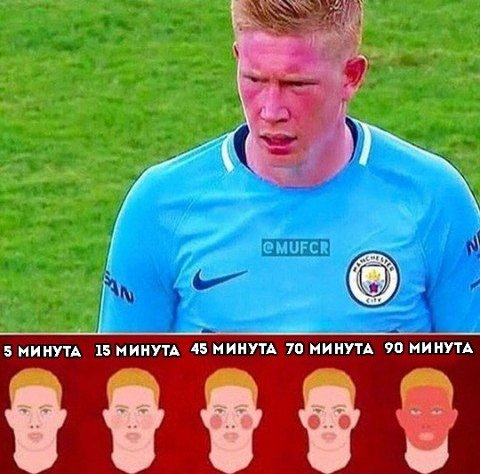


In [ ]:
player = 'Kevin De Bruyne'

Good luck & have fun! :)

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

pd.set_option('mode.chained_assignment',None)

# Задание 0

Привидите все данные к корректному типу

* Зададим тип данным, которые не имеют конкретный тип (object данные), изучив документацию к описанным данным

In [ ]:
data_types = df.dtypes.to_dict()
object_data = [key for key in data_types if data_types[key] == 'object']
print("\n".join(map(str, object_data)))

id
timestamp
type_name
possession_team_name
play_pattern_name
team_name
tactics_lineup
related_events
player_name
position_name
pass_recipient_name
pass_height_name
pass_body_part_name
pass_type_name
pass_outcome_name
ball_receipt_outcome_name
ball_recovery_recovery_failure
under_pressure
interception_outcome_name
counterpress
duel_outcome_name
duel_type_name
dribble_outcome_name
pass_switch
pass_aerial_won
pass_cross
pass_assisted_shot_id
pass_shot_assist
shot_key_pass_id
shot_body_part_name
shot_technique_name
shot_type_name
shot_outcome_name
shot_freeze_frame
goalkeeper_position_name
goalkeeper_technique_name
goalkeeper_body_part_name
goalkeeper_type_name
goalkeeper_outcome_name
50_50_outcome_name
block_offensive
shot_first_time
injury_stoppage_in_chain
foul_won_advantage
foul_committed_advantage
dribble_overrun
pass_backheel
shot_one_on_one
substitution_outcome_name
substitution_replacement_name
pass_cut_back
foul_committed_type_name
foul_won_defensive
dribble_nutmeg
shot_aerial_wo

In [ ]:
# замена типа данных в таблице
def data_astype_inplace(df, dct):
    columns_names = [*dct]
    df[columns_names] = df.astype(dct)[columns_names]

# подготовка типов данных к анализу
def prepare_data_types(df):
    # там, где значения нужно поставить bool, не делаем, так как они меняют NaN на True
    data_astype_inplace(df, {
               'type_name': 'string',
               'possession_team_name': 'string',
               'play_pattern_name': 'string',
               'team_name': 'string',
               'player_name': 'string',
               'position_name': 'string',
               'pass_recipient_name': 'string',
               'pass_height_name': 'string',
               'pass_body_part_name': 'string',
               'pass_type_name': 'string',
               'pass_outcome_name': 'string',
               'ball_receipt_outcome_name': 'string',
#                'under_pressure': 'bool',
               'interception_outcome_name': 'string',
#                'counterpress': 'bool',
               'duel_outcome_name': 'string',
               'duel_type_name': 'string',
               'dribble_outcome_name': 'string',
#                'pass_switch': 'bool',
#                'pass_aerial_won': 'bool',
#                'pass_cross': 'bool',
#                'pass_shot_assist': 'bool',
               'shot_body_part_name': 'string',
               'shot_technique_name': 'string',
               'shot_type_name': 'string',
               'shot_outcome_name': 'string',
               'goalkeeper_position_name': 'string',
               'goalkeeper_technique_name': 'string',
               'goalkeeper_body_part_name': 'string',
               'goalkeeper_type_name': 'string',
               'goalkeeper_outcome_name': 'string',
               '50_50_outcome_name': 'string',
#                'block_offensive': 'bool',
#                'shot_first_time': 'bool',
#                'injury_stoppage_in_chain': 'bool',
#                'foul_won_advantage': 'bool',
#                'foul_committed_advantage': 'bool',
#                'dribble_overrun': 'bool',
#                'pass_backheel': 'bool',
#                'shot_one_on_one': 'bool',
               'substitution_outcome_name': 'string',
               'substitution_replacement_name': 'string',
#                'pass_cut_back': 'bool',
               'foul_committed_type_name': 'string',
#                'foul_won_defensive': 'bool',
#                'dribble_nutmeg': 'bool',
#                'shot_aerial_won': 'bool',
#                'pass_goal_assist': 'bool',
               'foul_committed_card_name': 'string',
#                'clearance_aerial_won': 'bool',
#                'pass_deflected': 'bool',
#                'block_deflection': 'bool',
#                'ball_recovery_offensive': 'bool',
#                'shot_deflected': 'bool',
#                'foul_committed_offensive': 'bool',
#                'pass_miscommunication': 'bool',
               'pass_technique_name': 'string',
               'bad_behaviour_card_name': 'string',
#                'miscontrol_aerial_won': 'bool',
#                'block_save_block': 'bool',
#                'shot_open_goal': 'bool',
#                'foul_committed_penalty': 'bool',
#                'foul_won_penalty': 'bool',
#                'shot_follows_dribble': 'bool'
    })
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S.%f')

prepare_data_types(df)

data_types = df.dtypes.to_dict()
object_data = [key for key in data_types if data_types[key] == 'object']
print('Данные, у которых остался тип object:\n', '\n'.join(map(str, object_data)), sep='')

Данные, у которых остался тип object:
id
tactics_lineup
related_events
ball_recovery_recovery_failure
under_pressure
counterpress
pass_switch
pass_aerial_won
pass_cross
pass_assisted_shot_id
pass_shot_assist
shot_key_pass_id
shot_freeze_frame
block_offensive
shot_first_time
injury_stoppage_in_chain
foul_won_advantage
foul_committed_advantage
dribble_overrun
pass_backheel
shot_one_on_one
pass_cut_back
foul_won_defensive
dribble_nutmeg
shot_aerial_won
pass_goal_assist
clearance_aerial_won
pass_deflected
block_deflection
ball_recovery_offensive
shot_deflected
foul_committed_offensive
pass_miscommunication
pass_through_ball
shot_redirect
miscontrol_aerial_won
block_save_block
shot_open_goal
foul_committed_penalty
foul_won_penalty
shot_follows_dribble


# Задание 1

## Вначале исследуем данные

Тут в первую очередь приветсвуется ваше креативность, однако несколько графиков нужно посчитать обязательно

1) Визуализируйте количество совершенных игроком действий за весь чемпионат, разбив по типам действий (вам тут пригодится библиотека seabourn, функция barplot (https://www.kaggle.com/learn/data-visualization)

2) Выбросьте всех игроков, чье суммарное колличество действий ниже 55

3) Посмотрим в какой квантиль входит по количеству отдданых пасов относительно всех остальных (тут вам поможет функция cdf, так как она является обратной к функции вычисления квантилей) (https://mipt-stats.gitlab.io/courses/python/07_scipy_stats.html)

4) В каком проценте матчей команды игрок выходил на поле (сравните количество матчей игрока в данных и количество матчей команды)

5) А сколько футболист провел времени на поле? (вам помогут ивенты Substitution', 'Player Off','Player On')

6) Креатив, поищите тут выбросы в данных с помощью boxplot, поисследуйте распределения команды игрока и всех остальных команд, все, на что хватит фантазии и что вам покажется полезным

**Задание 1.1**

* Напишем функцию визуализации количества действий, которые совершал игрок

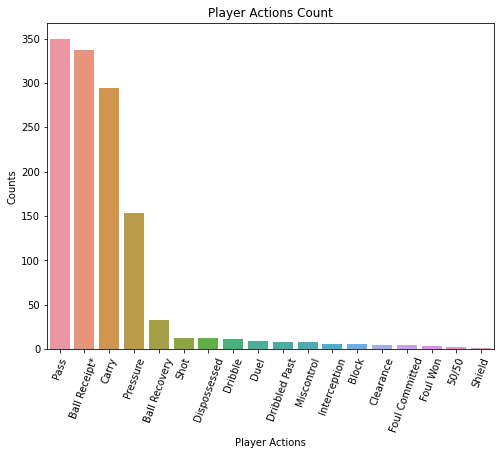

In [ ]:
# визуализация количества действий, которые совершал игрок
def player_actions_barplot(df, player):
    # события, которые происходили с игроком во время матча
    action_data = df[df['player_name'] == player]['type_name'].value_counts().rename_axis('Player Actions').reset_index(name='Counts')
    # отрисовка этих событий
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title('Player Actions Count')
    ax.tick_params(axis='x', rotation=70)
    sns.barplot(ax=ax, x='Player Actions', y='Counts', data=action_data)

player_actions_barplot(df, player)

**Задание 1.2**

* Напишем функцию фильтра игроков по количеству совершённых действий

In [ ]:
# фильтрация игроков по количеству действий, которые они совершали
def filter_by_actions_amount(df, actions_count):
    # для каждого игрока посчитаем количество действий
    players_actions_amount = df.groupby('player_name')['type_name'].agg(['count']).reset_index()
    dropped_players = players_actions_amount[players_actions_amount['count'] < actions_count]['player_name']
    # удаление информации об игроках, у которых число событий меньше `actions_count`
    df = df[~df['player_name'].isin(dropped_players)]

filter_by_actions_amount(df, 55)

**Задание 1.3**

* Напишем функцию для определения квантиля отданных играком пасов

Количество пасов Kevin De Bruyne принадлежит квантилю 0.9734660033167496


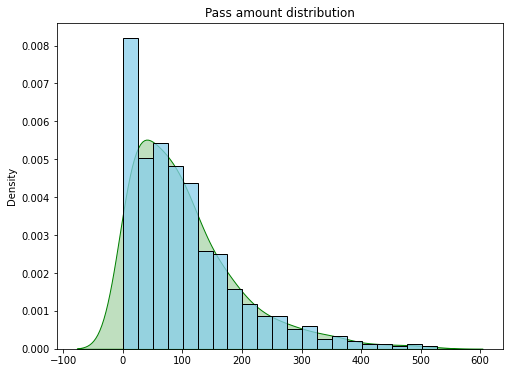

In [ ]:
# нахождение квантиля, которому принадлежит количество пасов игрока
def get_player_pass_quantile(df, player):
    # найдём количество пасов, отданных игроком
    player_pass_amount = len(df[(df['player_name'] == player) & (df['type_name'] == 'Pass')])

    # для каждого игрока посчитаем количество отданных пасов
    players_pass_count = df.groupby('player_name')['type_name'].apply(lambda action_type: (action_type == 'Pass').sum()).reset_index(name='count')
    # для каждого количества пасов посчитаем количество игроков, которые сделали столько пасов
    passes_data = players_pass_count['count'].value_counts().rename_axis('PassAmounts').reset_index(name='Counts')
    # вычислим для каждого количества пасов значение функции распределения
    players_amount = passes_data['Counts'].sum()
    passes_data['Percentage'] = passes_data.apply(lambda x: passes_data[passes_data['PassAmounts'] <= x.PassAmounts]['Counts'].sum() / players_amount, axis=1)

    # находим значение функции распределения для количества пассов игрока
    return float(passes_data[passes_data['PassAmounts'] == player_pass_amount]['Percentage'])


# построение графика распределения количества пасов
def pass_distribution_plot(df):
    # для каждого игрока посчитаем количество отданных пасов
    players_pass_count = df.groupby('player_name')['type_name'].apply(lambda action_type: (action_type == 'Pass').sum()).reset_index(name='count')
    pass_counts = players_pass_count['count'].tolist()
    # отрисуем полученную выборку
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(pass_counts, stat='density', color='skyblue', ax=ax)
    sns.kdeplot(pass_counts, fill=True, color='green', ax=ax)
    ax.set_title('Pass amount distribution')
    plt.show()

print('Количество пасов ', player, ' принадлежит квантилю ', get_player_pass_quantile(df, player), sep='')
pass_distribution_plot(df)

**Задание 1.4**

* Напишем функцию, вычисляющую процент участия игрока в матчах команды

In [ ]:
# нахождение процента выхода игрока на матчи
def matches_participate_percentage(df, player):
    # команды, за который играл игрок (в случае ЧМ-2018 для всех игроков это одна единственная команда -- страна, за которую они играют)
    player_teams = set(df[df['player_name'] == player]['team_name'])
    # матчи, которые играли команды
    teams_matches = set(df[df['team_name'].isin(player_teams)]['match_id'])
    # матчи, которые играл спортсмен
    player_matches = set(df[df['player_name'] == player]['match_id'])
    # процент выхода игрока на матчи
    return len(teams_matches & player_matches) / len(teams_matches) * 100

print('Процент выхода ', player, ' на матчи ', matches_participate_percentage(df, player), sep='')

Процент выхода Kevin De Bruyne на матчи 85.71428571428571


**Задание 1.5**

* Напишем функцию, подсчитывающую количество времени, которое футболист провёл не поле за весь чемпионат

In [ ]:
from datetime import datetime

# нахождение времени, которое провёл игрок на поле за весь чемпионат
def player_pitch_time(df, player):
    # матчи, которые играл спортсмен
    player_matches = set(df[df['player_name'] == player]['match_id'])
    # общее время игры на поле
    total_time = df['timestamp'].min()
    # для каждого матча вычислим время, проведённое игроком на поле
    for match in player_matches:
        palyer_data = df[(df['player_name'] == player) & (df['match_id'] == match)]
        palyer_data.sort_values(by=['type_name'], inplace=True)
        for half in [1, 2, 3, 4]:
            # временнтые отметки в заданном тайме (от начала игры спортсмена до окночания тайма / замены игрока)
            half_time = palyer_data[palyer_data['period'] == half]['timestamp']
            if len(half_time) == 0: # игрок не играл в данном тайме
                continue
            # временные отметки выхода и возвращение на поле
            player_time = pd.DataFrame({'time_on': palyer_data[(palyer_data['period'] == half) & 
                                                           (palyer_data['type_name'] == 'Player On')]['timestamp'].tolist(),
                                        'time_off': palyer_data[(palyer_data['period'] == half) & 
                                                            (palyer_data['type_name'] == 'Player Off')]['timestamp'].tolist()})
            if len(player_time) == 0: # в данном тайме не было ухода с поля
                total_time += (half_time.max() - half_time.min())
                continue
            # время, которое отсутсвовал игрок
            player_time['time_delta'] = player_time.apply(lambda x: x['time_on'] - x['time_off'], axis=1)
            # суммарное время, проведённое на поле
            total_time += (half_time.max() - half_time.min()) - player_time['time_delta'].sum()
    return total_time.strftime('%H:%M:%S')

print('Суммарное время, которое ', 'player', ' провёл на поле ', player_pitch_time(df, player), sep='')

Суммарное время, которое player провёл на поле 09:16:31


**Задание 1.6**

Посмотрим на характеристики команд

* Посмотрим на количество сыгранных матчей каждой командой

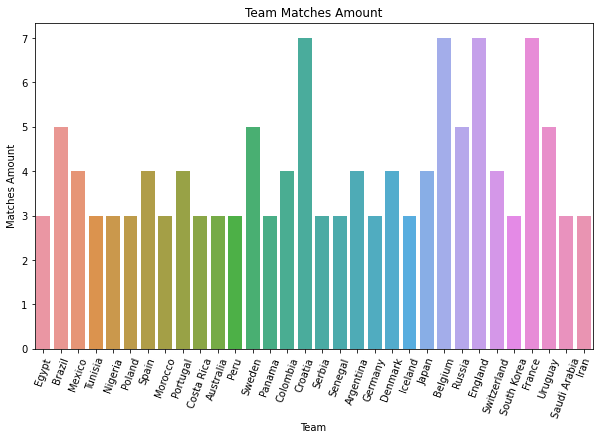

In [ ]:
# построение диаграммы количества матчей, сыгранных командами за весь чемпионат
def team_matches_amount(df):
    teams = list(set(df['team_name']))
    matches_amount = list()
    for team in teams:
        matches_amount.append(len(set(df[df['team_name'] == team]['match_id'])))
    # для каждой команды посчитаем количество ударов
    team_matches_count = pd.DataFrame({'Team': teams, 'Matches Amount': matches_amount})
    # отрисовка полученного количества
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Team Matches Amount')
    ax.tick_params(axis='x', rotation=70)
    sns.barplot(ax=ax, x='Team', y='Matches Amount', data=team_matches_count)

team_matches_amount(df)

* Интересным будет исследовать количество ударов по воротам, которые сделали команды за весь чемпионат

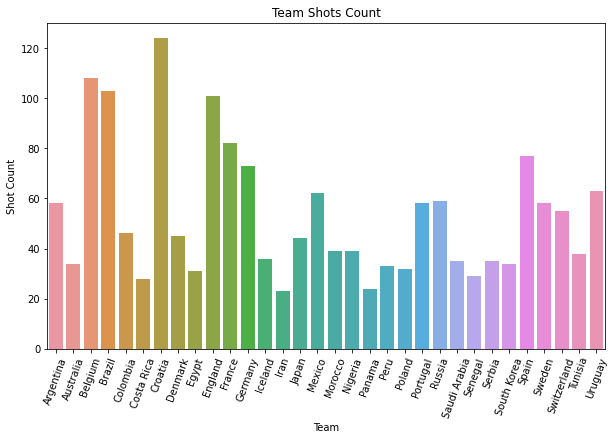

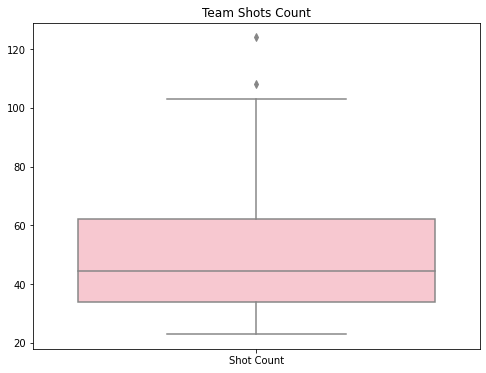

In [ ]:
# построение диаграммы количества ударов, совершённых командами за весь чемпионат
def team_shots_amount(df):
    # для каждой команды посчитаем количество ударов
    team_shots_count = df.groupby('team_name')['type_name']\
                            .apply(lambda action_type: (action_type == 'Shot').sum())\
                            .rename_axis('Team').reset_index(name='Shot Count')
    # отрисовка полученного количества
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Team Shots Count')
    ax.tick_params(axis='x', rotation=70)
    sns.barplot(ax=ax, x='Team', y='Shot Count', data=team_shots_count)

# построение ящика с усами, показывающее количество ударов, совершённых командами за весь чемпионат
def team_shots_amount_boxplot(df):
    # для каждой команды посчитаем количество ударов
    team_shots_count = df.groupby('team_name')['type_name']\
                            .apply(lambda action_type: (action_type == 'Shot').sum())\
                            .rename_axis('Team').reset_index(name='Shot Count')
    # отрисовка полученного количества
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title('Team Shots Count')
    sns.boxplot(ax=ax, data=team_shots_count, color='pink')

team_shots_amount(df)
team_shots_amount_boxplot(df)

* Исследуем число жёлтых и красных карточек, которые получали игроки команды

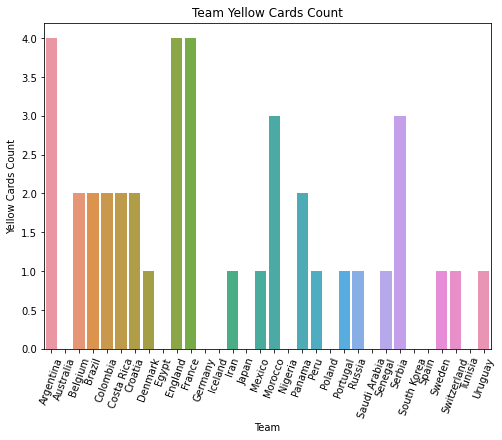

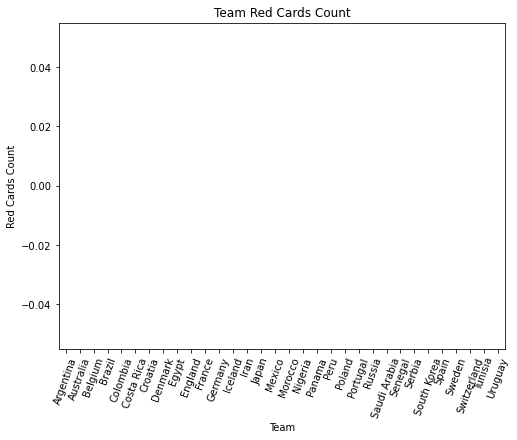

In [ ]:
# построение диаграммы количества жёлтых карточек, полученных командами за весь чемпионат
def team_yellow_cards(df):
    # для каждой команды посчитаем количество жёлтых карточек
    team_shots_count = df.groupby('team_name')['bad_behaviour_card_name'].apply(lambda card: ((card == 'Yellow Card') | (card == 'Second Yellow')).sum())\
                            .rename_axis('Team').reset_index(name='Yellow Cards Count')
    # отрисовка полученного количества
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title('Team Yellow Cards Count')
    ax.tick_params(axis='x', rotation=70)
    sns.barplot(ax=ax, x='Team', y='Yellow Cards Count', data=team_shots_count)

# построение диаграммы количества красных карточек, полученных командами за весь чемпионат
def team_red_cards(df):
    # для каждой команды посчитаем количество жёлтых карточек
    team_shots_count = df.groupby('team_name')['bad_behaviour_card_name'].apply(lambda card: (card == 'Red Card').sum())\
                            .rename_axis('Team').reset_index(name='Red Cards Count')
    # отрисовка полученного количества
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_title('Team Red Cards Count')
    ax.tick_params(axis='x', rotation=70)
    sns.barplot(ax=ax, x='Team', y='Red Cards Count', data=team_shots_count)

team_yellow_cards(df)
team_red_cards(df)

# Задание 2

## Визуализация данных
1) Посмотрите, как изменялся показатель количества действий игрока на отрезках по 5 и 15 минут с разбивкой в том числе по таймам (фунция должна содержать 3 переменные: имя игрока, временная дельта, тип действия (также возможен вариант всех действий))

2) Напишите функцию, которая визуализирует действие игрока на поле, пасы и проход с мячом (carries) должны включать направление, все остальные плотность(kde) (функция включает 2 переменные: имя игрока, тип действия)

3) Та же самая функция, но при этом бьем поле на квадраты. Для оборонительных действий разделение по оси y строго 1. Параметры функции: имя игрока, действие, на сколько частей разбиваем поле в формате [n,m]

4) Как отличаются зоны опасных (passes within 15 seconds of a shot, exclude corners.) передач игрока отностительно партнеров и всех остальных игроков турнира (игроки должны относиться к той же позиции, что и ваш игрок)

5) Поделите поле снова на зоны, только теперь в качестве значений передавайте процент удачных передач из зоны

6) БОНУС! Поделите поле снова на зоны, узнайте куда игрок предпочитает отдавать (направление) передачи из зоны (назад, поперек, вперед) (вам поможет тригонометрия )


**Задание 2.1**
* Напишем функцию определения изменения показателя количества действий игрока

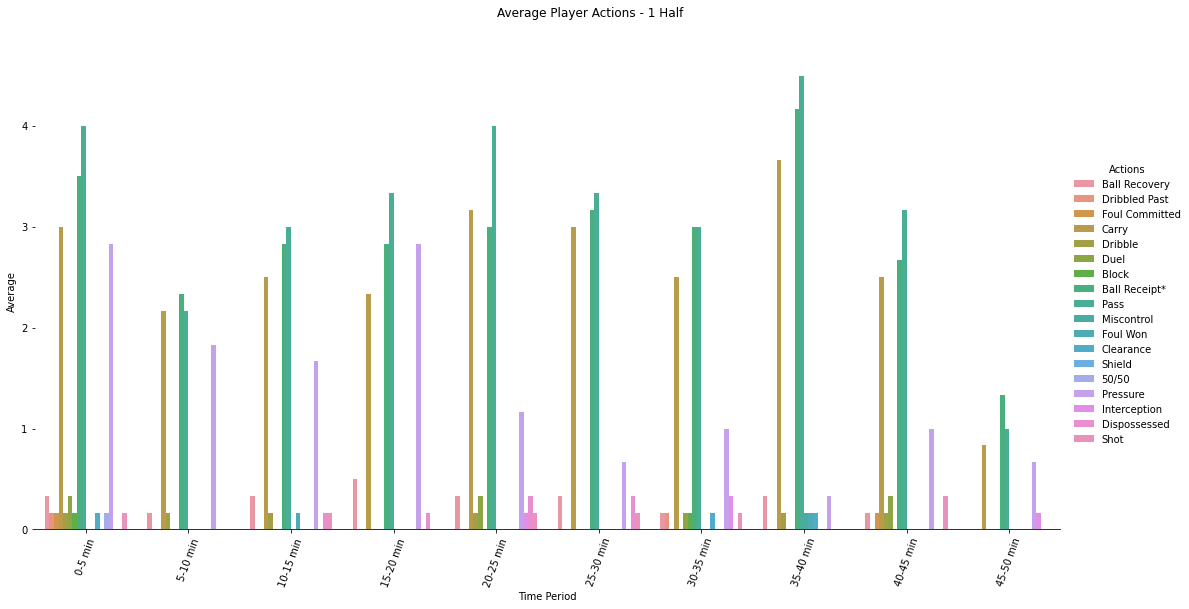

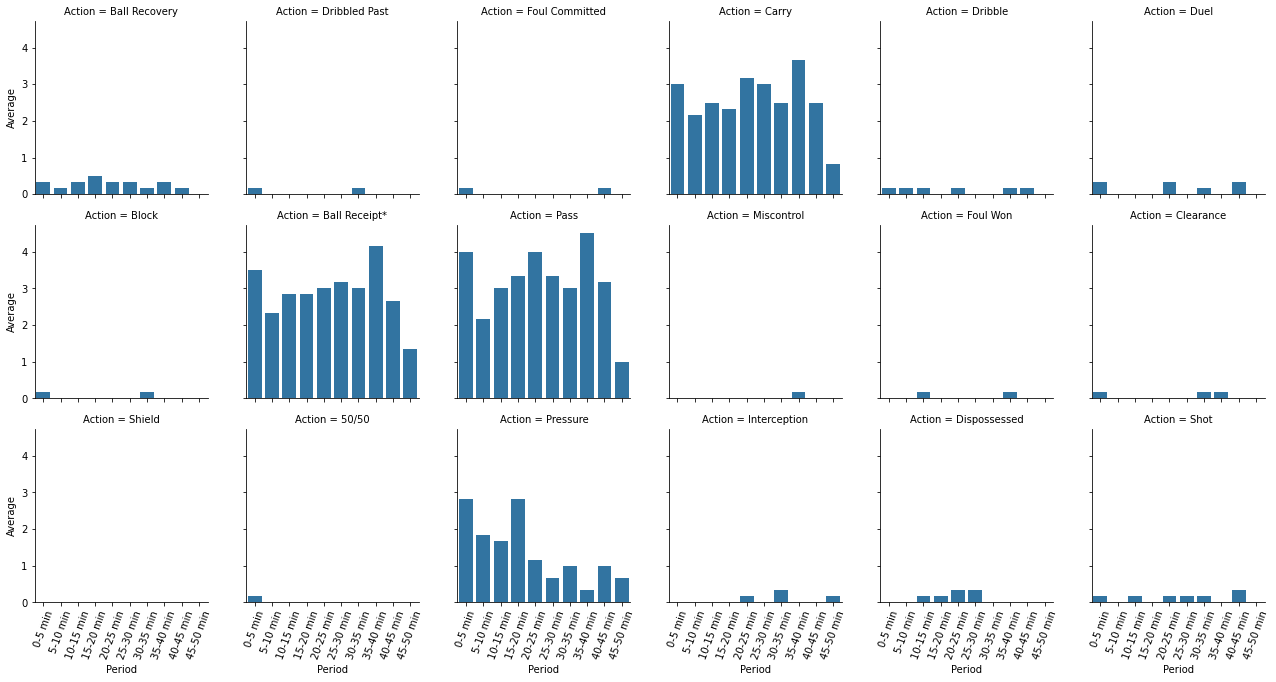

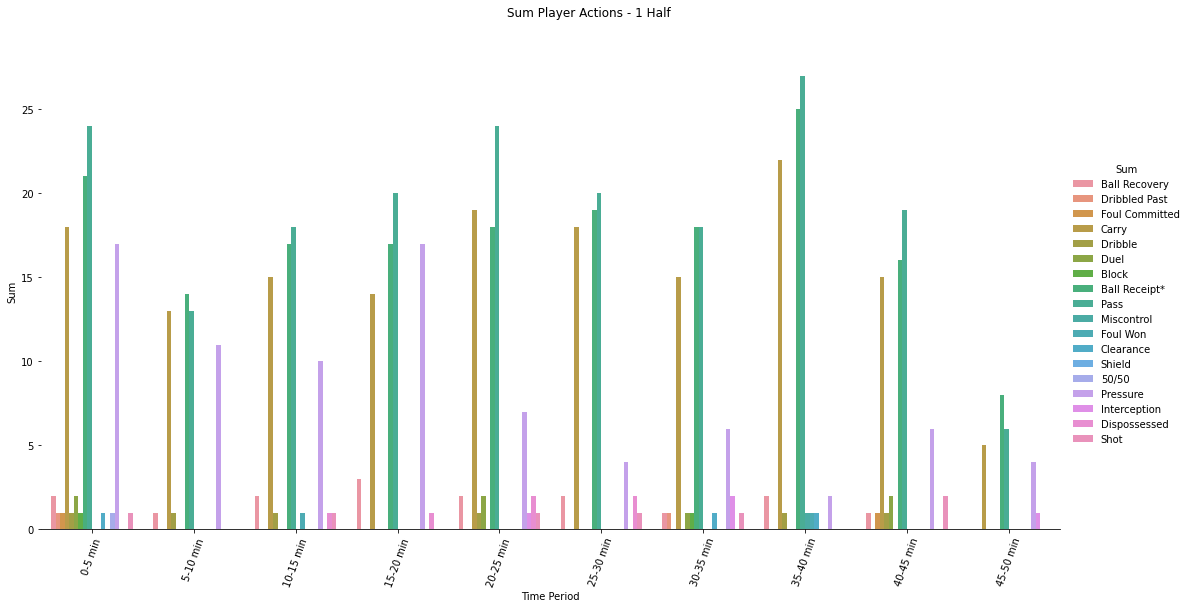

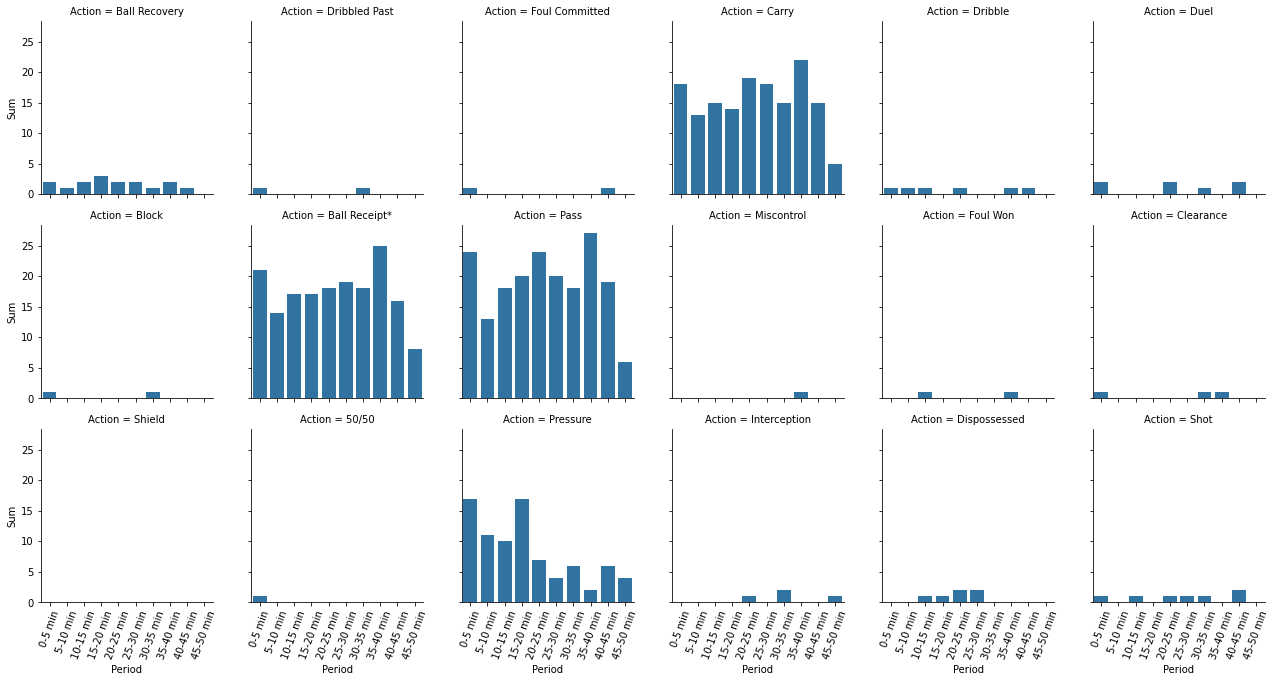

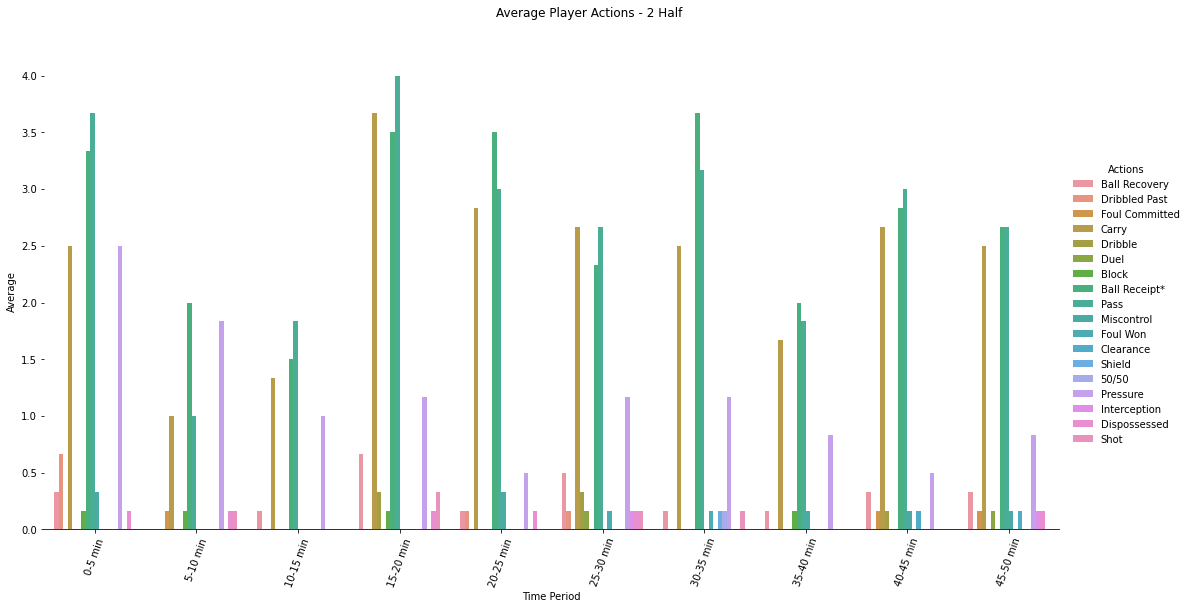

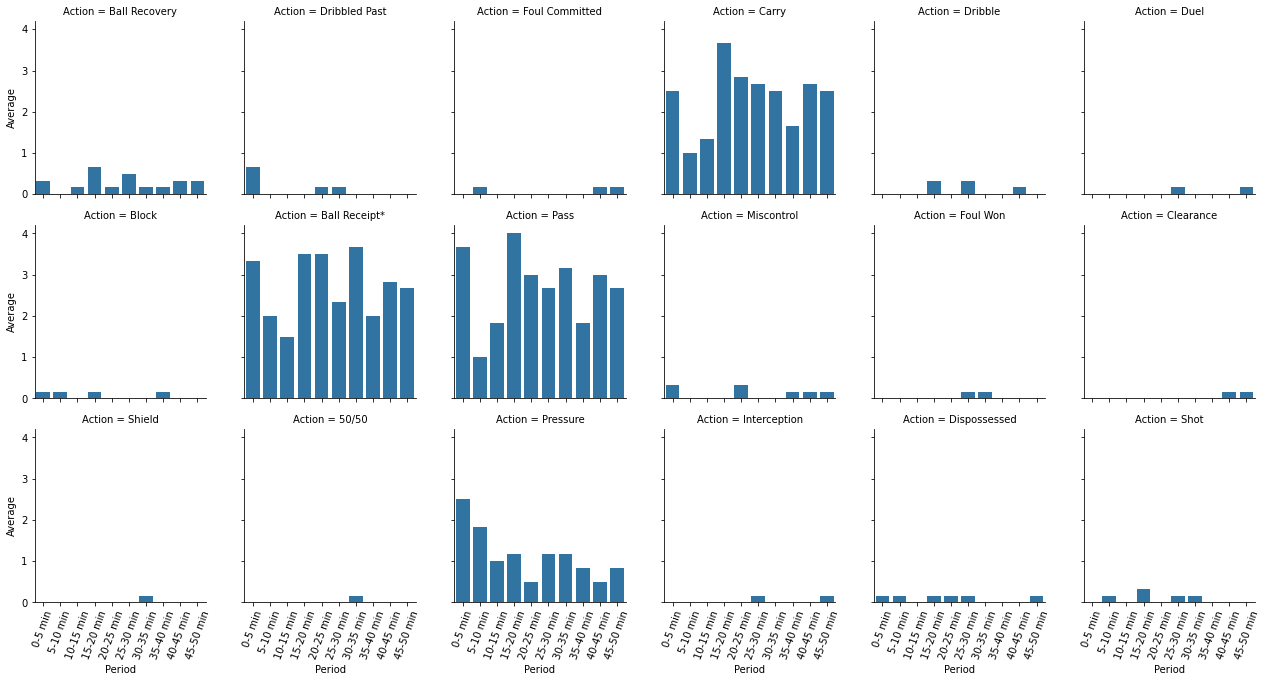

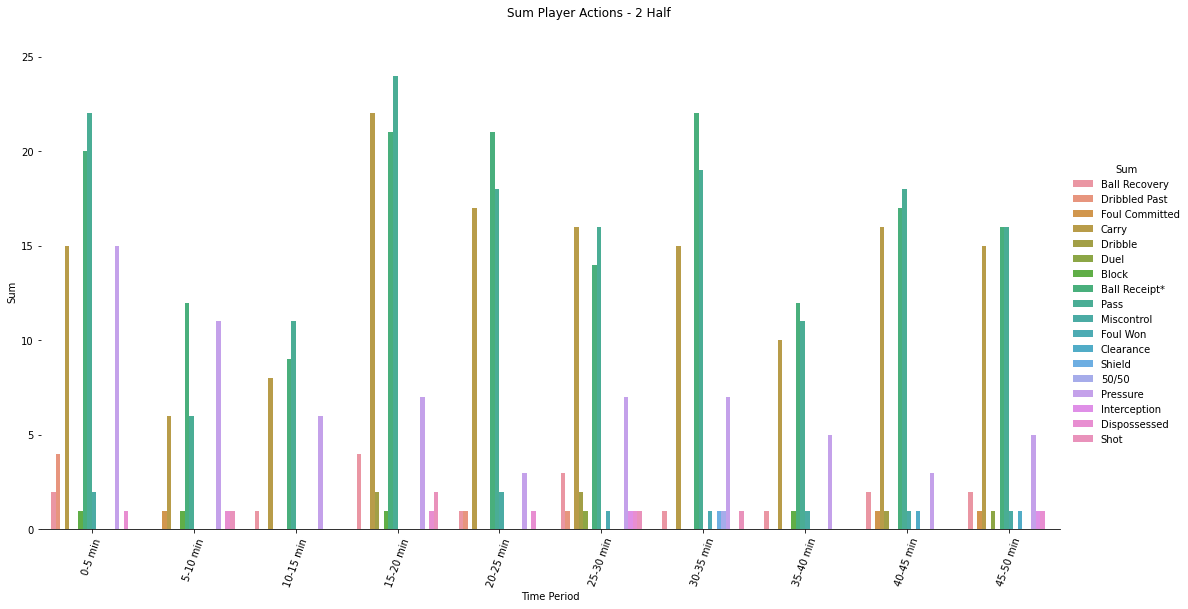

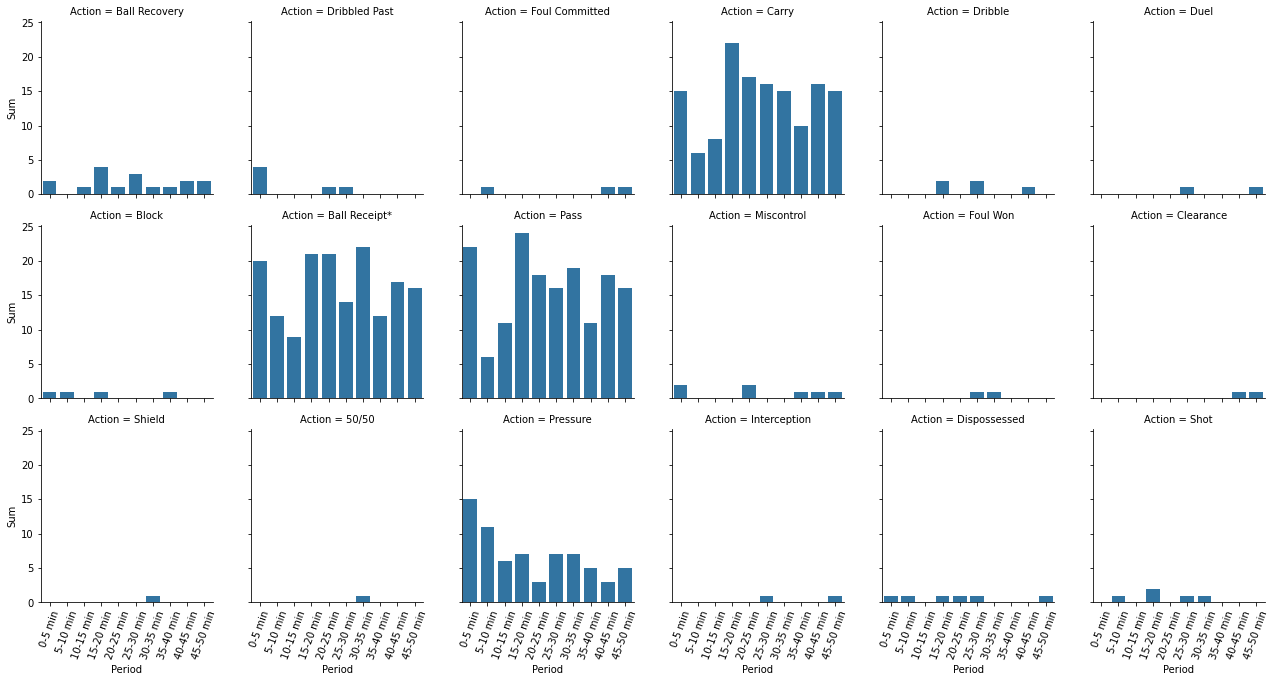

In [ ]:
from datetime import timedelta

# визуализация действий игрока во время определённого тайма
def actions_amount_half(df, player, delta, half, action_type='All'):
    # действия игрока, которые нужно проанализировать
    actions = [action_type]
    if action_type == 'All':
        actions = list(set(df[df['player_name'] == player]['type_name']))
    # данные игрока в определённом тайме
    half_data = df[(df['player_name'] == player) & (df['period'] == half)]
    # если игрок не играл в данном тайме
    if len(half_data) == 0:
        return None
    # текущий временной промежуток
    curr_time = half_data['timestamp'].min()
    next_time = curr_time + timedelta(minutes=delta)
    # запишем данные действий по каждому временному промежутку в таблицу
    action_data = pd.DataFrame(columns = ['Action', 'Average', 'Sum', 'Period'])
    max_time = half_data['timestamp'].max()
    time_period = 1
    while curr_time < max_time:
        matches_amount = len(set(half_data['match_id']))
        for action in actions:
            average = len(half_data[(half_data['type_name'] == action) &
                                     (half_data['timestamp'] >= curr_time) &
                                     (half_data['timestamp'] < next_time)]) / matches_amount
            sum = len(half_data[(half_data['type_name'] == action) &
                                 (half_data['timestamp'] >= curr_time) &
                                 (half_data['timestamp'] < next_time)])
            action_data = action_data.append(pd.DataFrame([[action, average, sum, str((time_period - 1) * delta) + '-' + str(time_period * delta) + ' min']],
                                                          columns=['Action', 'Average', 'Sum', 'Period']))
        # переходим к следующему временному периоду
        curr_time = next_time
        next_time += timedelta(minutes=delta)
        time_period += 1
        
    # отрисовка среднего количество действий в период
    average_graph = sns.catplot(data=action_data, kind='bar', x='Period', y='Average', hue='Action', height=8, aspect=15 / 8)
    average_graph.despine(left=True)
    average_graph.set_axis_labels('Time Period', 'Average')
    average_graph.legend.set_title('Actions')
    average_graph.set_xticklabels(rotation=70)
    average_graph.fig.subplots_adjust(top=0.9)
    average_graph.fig.suptitle('Average Player Actions - ' + str(half) + ' Half')

    average_grid = sns.FacetGrid(data=action_data, col='Action', height=3, col_wrap=6)
    average_grid.map(sns.barplot, 'Period', 'Average')
    average_grid.set_xticklabels(rotation=70)

    # отрисовка суммарного количество действий в период
    sum_graph = sns.catplot(data=action_data, kind='bar', x='Period', y='Sum', hue='Action', height=8, aspect=15 / 8)
    sum_graph.despine(left=True)
    sum_graph.set_axis_labels('Time Period', 'Sum')
    sum_graph.legend.set_title('Sum')
    sum_graph.set_xticklabels(rotation=70)
    sum_graph.fig.subplots_adjust(top=0.9)
    sum_graph.fig.suptitle('Sum Player Actions - ' + str(half) + ' Half')

    sum_grid = sns.FacetGrid(data=action_data, col='Action', height=3, col_wrap=6)
    sum_grid.map(sns.barplot, 'Period', 'Sum')
    sum_grid.set_xticklabels(rotation=70)


# визуализация количества действий игрока во временные промежутки
def player_actions_amount(df, player, delta, action_type='All'):
    actions_amount_half(df, player, delta, 1, action_type)
    actions_amount_half(df, player, delta, 2, action_type)
    actions_amount_half(df, player, delta, 3, action_type)
    actions_amount_half(df, player, delta, 4, action_type)
            
player_actions_amount(df, player, 5)

**Задание 2.2** 
* Напишем функцию, которая визуализирует действие игрока на поле.

пасы и проход с мячом (carries) должны включать направление, все остальные плотность(kde) (функция включает 2 переменные: имя игрока, тип действия)

In [ ]:
def player_actions_visualization(df, player, action_type='All'):
    

**Задание 2.3**
* Напишем функцию, отличающую зоны опасных передач игрока **(недоделано...)**

In [ ]:
from datetime import timedelta

# Смотрим на вермя пасов, сделанных полузащитниками (без угловых)
df[(df['pass_type_name'] != 'Corner') & (df['position_name'] == 'Center Attacking Midfield')]['timestamp']
#def compare_players_pass_zones(df):

661    1900-01-01 00:15:43.720
1905   1900-01-01 00:00:00.800
1941   1900-01-01 00:00:41.400
3712   1900-01-01 00:49:11.480
385    1900-01-01 00:12:06.740
                 ...          
1291   1900-01-01 00:39:10.434
2029   1900-01-01 00:14:31.160
2229   1900-01-01 00:21:09.920
2264   1900-01-01 00:21:53.333
2702   1900-01-01 00:20:02.533
Name: timestamp, Length: 223, dtype: datetime64[ns]

# Задание 3

## Расчет ключевых метрик

1) Каждая команда создает свой excel файл, где хранит метрики, которые она рассчитывает для оценки перформанса игроков, файл будет пополняться в течение всего курса

2) Рассчитайте с кем у игрока самая сильная связь на поле (то есть кому и от кого он получает больше всего передач). Функция вернет двух партнеров (чаще всего пасует, чаще всего принимает)

3) Насколько игрок важен для команды (какой процент действий с мячом он совершает относительно партнеров)

4) Сколько пасов он отдает в финальную треть поля per 90, также квантиль относительно всех игроков его позиции

5) Сколько пасов он отдает в штрафную площадь per 90, также квантиль относительно всех игроков его позиции

7) Сколько пасов он принимает в финальной трети соперника per 90, также квантиль относительно всех игроков его позиции

8) Сколько пасов под удар (то есть после его передачи наносится удар) per 90, также квантиль относительно всех игроков его позиции

9) Какой passing tempo (скорость пасов) у игрока, учитываем пасы только на трети поля соперника

10) БОНУС насколько игрок хорош в возврате владения. Сколько раз он вернул мяч после потери в течение 5 секунд (вам пригодится значение ball_recovery в колонке type)

11) Выберите наиболее важные как вам кажется метрики из файла Player_match_stats (https://drive.google.com/file/d/16pRbUKM6mqghWUBrJoGqvPA2pydpkFOp/view?usp=sharing) и добавьте в свой файл excel. 

**Задание 3.1**
* `тут должна быть ссылка на excel`

**Задание 3.2**
* Напишем функцию, расчитывающую с кем у игрока самая сильная связь на поле

In [ ]:
# получение игроков, с которыми у спортсмена самая сильная связь
def player_most_passes_connection(df, player):
    # получатели паса спортсмена
    player_pass_recipients = set(df[(df['player_name'] == player) & (df['type_name'] == 'Pass')]['pass_recipient_name'])
    most_frequent_recipient = ''
    frequency = 0
    for recipient in player_pass_recipients:
        recipient_frquency = len(df[(df['player_name'] == player) & (df['type_name'] == 'Pass') & (df['pass_recipient_name'] == recipient)])
        if recipient_frquency > frequency:
            most_frequent_recipient = recipient
            frequency = recipient_frquency
    # игроки, отдавшие пас спортсмену
    passing_players = set(df[(df['type_name'] == 'Pass') & (df['pass_recipient_name'] == player)]['player_name'])
    most_frequent_passing_player = ''
    frequency = 0
    for passing_player in passing_players:
        passing_player_frquency = len(df[(df['type_name'] == 'Pass') & (df['pass_recipient_name'] == player) & (df['player_name'] == passing_player)])
        if passing_player_frquency > frequency:
            most_frequent_passing_player = passing_player
            frequency = passing_player_frquency
    # возврат результата
    return most_frequent_recipient, most_frequent_passing_player

(pass_to, pass_from) = player_most_passes_connection(df, player)
print('Наибольшее количество пасов ', player, ' отдал ', pass_to, sep='')
print('Наибольшее количество пасов ', player, ' принимал от ', pass_from, sep='')

Наибольшее количество пасов Kevin De Bruyne отдал Eden Hazard
Наибольшее количество пасов Kevin De Bruyne принимал от Eden Hazard


**Задание 3.3**
* Напишем функцию вычисляющую "важность игрока" - процент действий с мячом относительно действий команды

In [ ]:
# получение процента действий с мячом игрока относительно действий всей команды за весь чемпионат
def player_importance_general(df, player):
    # количество действий игрока
    player_actions_amount = len(df[df['player_name'] == player])
    # команды, за который играл игрок (в случае ЧМ-2018 для всех игроков это одна единственная команда -- страна, за которую они играют)
    player_teams = set(df[df['player_name'] == player]['team_name'])
    # количество действий всех игроков команды
    teams_actions_amount = len(df[df['team_name'].isin(player_teams)])
    # "важность игрока"
    return player_actions_amount / teams_actions_amount * 100

# получение среднего процента действий с мячом игрока относительно действий всей команды за все матчи чемпионата
def player_importance_match_average(df, player):
    # команды, за который играл игрок (в случае ЧМ-2018 для всех игроков это одна единственная команда -- страна, за которую они играют)
    player_teams = set(df[df['player_name'] == player]['team_name'])
    # матчи команды
    teams_matches = set(df[df['team_name'].isin(player_teams)]['match_id'])
    # суммарный процент по каждому матчу
    sum_percentage = 0
    for match in teams_matches:
        # количество действий игрока за матч
        player_actions_amount = len(df[(df['player_name'] == player) & (df['match_id'] == match)])
        # количество действий всех игроков команды за матч
        teams_actions_amount = len(df[(df['team_name'].isin(player_teams)) & (df['match_id'] == match)])
        sum_percentage += player_actions_amount / teams_actions_amount * 100
    
    # "средняя важность игрока по матчам"
    return sum_percentage / len(teams_matches)

print('Общая важность ', player, ' составляет ', player_importance_general(df, player), ' процентов', sep='')
print('Среднаяя важность ', player, ' по всем матчам составляет ', player_importance_match_average(df, player), ' процентов', sep='')

Общая важность Kevin De Bruyne составляет 9.15185077236957 процентов
Среднаяя важность Kevin De Bruyne по всем матчам составляет 9.269843641950004 процентов


**Задание 3.4**
* Напишем функцию, вычисляющую количество пасов, которые игрок отдает в финальную треть поля per 90, а также квантиль относительно всех игроков его позиции

Количество пасов Kevin De Bruyne, отданных в финальную треть per90: 52


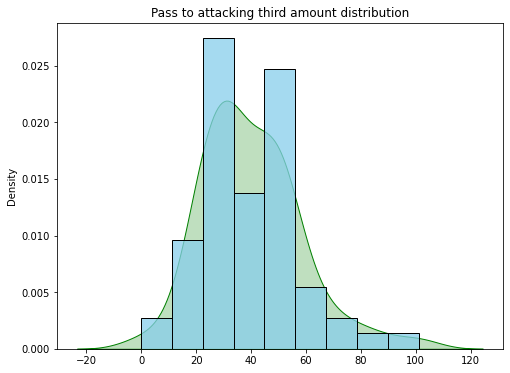

Количество пасов Kevin De Bruyne, отданных в финальную треть per90 принадлежит квантилю 0.8307692307692308


In [ ]:
# вычисление количество пасов игрока, отданных в финальную треть
def player_passes_final_third_per90(df, player):
    # размеры поля в ярдах
    pitch_x = 120
    pitch_y = 80
    # общее время, проведённоё игроком на поле в минутах
    total_player_time = (datetime.strptime(player_pitch_time(df, player), '%H:%M:%S') -
                         datetime.strptime('00:00:00', '%H:%M:%S')).total_seconds() / 60
    # количество пасов игрока, завершившихся в финальной трети
    final_third_passes_amount = len(df[(df['player_name'] == player) &
                                       (df['type_name'] == 'Pass') &
                                       (df['pass_end_x'] >= pitch_x / 3)])
    # количество пасов игрока, отданных в финальную треть per90
    return int(final_third_passes_amount / total_player_time * 90)

# нахождение квантиля, которому принадлежит количество пасов игрока, отданных в финальную треть
def player_passes_final_third_quantile(df, player):
    # размеры поля в ярдах
    pitch_x = 120
    pitch_y = 80
    # позиции игрока
    position = sorted(list(set(df[df['player_name'] == player]['position_name'])))[0]
    # найдём количество пасов, отданных игроком в финальную треть
    player_pass_amount = player_passes_final_third_per90(df, player)
    # для каждого игрока посчитаем количество отданных пасов в финальную треть
    players = set(df[df['position_name'] == position]['player_name'])
    players_pass_count = pd.DataFrame({'count' : [player_passes_final_third_per90(df, curr_player) 
                                                  for curr_player in players]})
    # для каждого возможного значения пасов в финальную треть посчитаем количество игроков, которые сделали столько пасов
    passes_data = players_pass_count['count'].value_counts().rename_axis('PassAmounts').reset_index(name='Counts')
    # вычислим для каждого количества пасов в финальную треть значение функции распределения
    passes_data['Percentage'] = passes_data.apply(lambda x: 
                            passes_data[passes_data['PassAmounts'] <= x.PassAmounts]['Counts'].sum() / len(players), axis=1)
    
    # отрисуем полученную выборку
    pass_counts = players_pass_count['count'].tolist()
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(pass_counts, stat='density', color='skyblue', ax=ax)
    sns.kdeplot(pass_counts, fill=True, color='green', ax=ax)
    ax.set_title('Pass to attacking third amount distribution')
    plt.show()
    
    # находим значение функции распределения для количества пассов игрока, отданных в финальную треть
    return float(passes_data[passes_data['PassAmounts'] == player_pass_amount]['Percentage'])

print('Количество пасов ', player, ', отданных в финальную треть per90: ', player_passes_final_third_per90(df, player), sep='')
print('Количество пасов ', player, ', отданных в финальную треть per90 принадлежит квантилю ', player_passes_final_third_quantile(df, player), sep='')

**Задание 3.5**
* Напишем функцию, вычисляющую количество пасов, которые игрок отдает в штрафную площадь per 90, а также квантиль относительно всех игроков его позиции

Количество пасов Kevin De Bruyne, отданных в штрафную площадь per90: 9


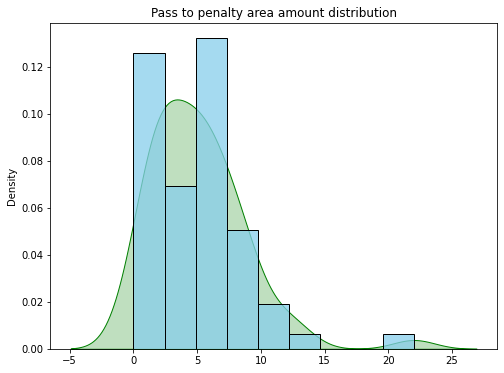

Количество пасов Kevin De Bruyne, отданных в штрафную площадь per90 принадлежит квантилю 0.9230769230769231


In [ ]:
# вычисление количество пасов игрока, отданных в штрафную площадь
def player_passes_penalty_area_per90(df, player):
    # размеры поля в ярдах
    pitch_x = 120
    pitch_y = 80
    # общее время, проведённоё игроком на поле в минутах
    total_player_time = (datetime.strptime(player_pitch_time(df, player), '%H:%M:%S') -
                         datetime.strptime('00:00:00', '%H:%M:%S')).total_seconds() / 60
    # количество пасов игрока, завершившихся в штрафной площади
    penalty_area_passes_amount = len(df[(df['player_name'] == player) &
                                       (df['type_name'] == 'Pass') &
                                       (df['pass_end_x'] >= pitch_x * 0.85) &
                                       (df['pass_end_y'] >= pitch_y * 0.225) &
                                       (df['pass_end_y'] <= pitch_y * 0.775)])
    # количество пасов игрока, отданных в штрафную площадь per90
    return int(penalty_area_passes_amount / total_player_time * 90)

# нахождение квантиля, которому принадлежит количество пасов игрока, отданных в штрафную площадь
def player_passes_penalty_area_quantile(df, player):
    # размеры поля в ярдах
    pitch_x = 120
    pitch_y = 80
    # позиции игрока
    position = sorted(list(set(df[df['player_name'] == player]['position_name'])))[0]
    # найдём количество пасов, отданных игроком в штрафную площадь
    player_pass_amount = player_passes_penalty_area_per90(df, player)
    # для каждого игрока посчитаем количество отданных пасов в штрафную площадь
    players = set(df[df['position_name'] == position]['player_name'])
    players_pass_count = pd.DataFrame({'count' : [player_passes_penalty_area_per90(df, curr_player) 
                                                  for curr_player in players]})
    # для каждого возможного значения пасов в штрафную площадь посчитаем количество игроков, которые сделали столько пасов
    passes_data = players_pass_count['count'].value_counts().rename_axis('PassAmounts').reset_index(name='Counts')
    # вычислим для каждого количества пасов в штрафную площадь значение функции распределения
    passes_data['Percentage'] = passes_data.apply(lambda x: 
                            passes_data[passes_data['PassAmounts'] <= x.PassAmounts]['Counts'].sum() / len(players), axis=1)
    
    # отрисуем полученную выборку
    pass_counts = players_pass_count['count'].tolist()
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(pass_counts, stat='density', color='skyblue', ax=ax)
    sns.kdeplot(pass_counts, fill=True, color='green', ax=ax)
    ax.set_title('Pass to penalty area amount distribution')
    plt.show()
    
    # находим значение функции распределения для количества пассов игрока, отданных в штрафную площадь
    return float(passes_data[passes_data['PassAmounts'] == player_pass_amount]['Percentage'])

print('Количество пасов ', player, ', отданных в штрафную площадь per90: ', player_passes_penalty_area_per90(df, player), sep='')
print('Количество пасов ', player, ', отданных в штрафную площадь per90 принадлежит квантилю ', player_passes_penalty_area_quantile(df, player), sep='')

**Задание 3.6**
* ??? нет задания с таким номером :)

**Задание 3.7**
* Напишем функцию, вычисляющую количество пасов, которые игрок принимает в финальной трети поля per 90, а также квантиль относительно всех игроков его позиции

Количество пасов Kevin De Bruyne, полученных в финальной трети per90: 41


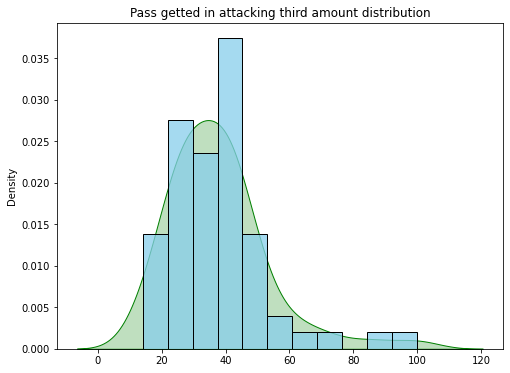

Количество пасов Kevin De Bruyne, полученных в финальной трети per90 принадлежит квантилю 0.676923076923077


In [ ]:
# вычисление количество пасов игрока, отданных в финальную треть
def player_passes_getted_final_third_per90(df, player):
    # размеры поля в ярдах
    pitch_x = 120
    pitch_y = 80
    # общее время, проведённоё игроком на поле в минутах
    total_player_time = (datetime.strptime(player_pitch_time(df, player), '%H:%M:%S') -
                         datetime.strptime('00:00:00', '%H:%M:%S')).total_seconds() / 60
    # количество пасов игрока, полученных в финальной трети
    final_third_getted_passes_amount = len(df[(df['type_name'] == 'Pass') &
                      (df['pass_recipient_name'] == player) &
                      (~df['pass_outcome_name'].isin(['Incomplete', 'Out', 'Unknown', 'Injury Clearance'])) &
                      (df['pass_end_x'] >= pitch_x / 3)])
    # количество пасов игрока, полученных в финальной трети per90
    return int(final_third_getted_passes_amount / total_player_time * 90)

# нахождение квантиля, которому принадлежит количество пасов игрока, отданных в финальную треть
def player_passes_getted_final_third_quantile(df, player):
    # размеры поля в ярдах
    pitch_x = 120
    pitch_y = 80
    # позиции игрока
    position = sorted(list(set(df[df['player_name'] == player]['position_name'])))[0]
    # найдём количество пасов, полученных в финальной трети
    player_pass_amount = player_passes_getted_final_third_per90(df, player)
    # для каждого игрока посчитаем количество полученных пасов в финальной трети
    players = set(df[df['position_name'] == position]['player_name'])
    players_pass_count = pd.DataFrame({'count' : [player_passes_getted_final_third_per90(df, curr_player) 
                                                  for curr_player in players]})
    # для каждого возможного значения пасов в финальную треть посчитаем количество игроков, которые сделали столько пасов
    passes_data = players_pass_count['count'].value_counts().rename_axis('PassAmounts').reset_index(name='Counts')
    # вычислим для каждого количества пасов в финальную треть значение функции распределения
    passes_data['Percentage'] = passes_data.apply(lambda x: 
                            passes_data[passes_data['PassAmounts'] <= x.PassAmounts]['Counts'].sum() / len(players), axis=1)
    
    # отрисуем полученную выборку
    pass_counts = players_pass_count['count'].tolist()
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(pass_counts, stat='density', color='skyblue', ax=ax)
    sns.kdeplot(pass_counts, fill=True, color='green', ax=ax)
    ax.set_title('Pass getted in attacking third amount distribution')
    plt.show()
    
    # находим значение функции распределения для количества пассов игрока, отданных в финальную треть
    return float(passes_data[passes_data['PassAmounts'] == player_pass_amount]['Percentage'])

print('Количество пасов ', player, ', полученных в финальной трети per90: ', player_passes_getted_final_third_per90(df, player), sep='')
print('Количество пасов ', player, ', полученных в финальной трети per90 принадлежит квантилю ', player_passes_getted_final_third_quantile(df, player), sep='')

**Задание 3.8**
* Напишем функцию, вычисляющую количество пасов под удар, которые игрок принимает и отдаёт, а также квантиль относительно всех игроков его позиции

Количество пасов Kevin De Bruyne, отданных под удар per90: 3


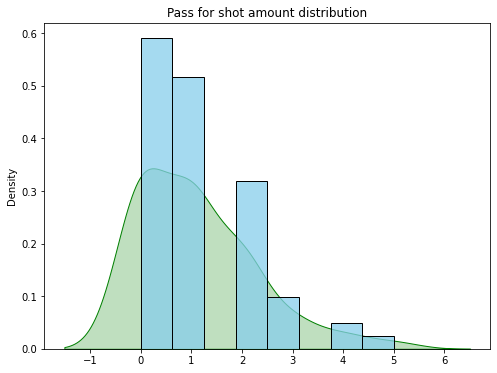

Количество пасов Kevin De Bruyne, отданных под удар per90 принадлежит квантилю 0.9538461538461539


In [ ]:
# вычисление количество пасов игрока, отданных под удар
def player_passes_for_shot_per90(df, player):
    # размеры поля в ярдах
    pitch_x = 120
    pitch_y = 80
    # общее время, проведённоё игроком на поле в минутах
    total_player_time = (datetime.strptime(player_pitch_time(df, player), '%H:%M:%S') -
                         datetime.strptime('00:00:00', '%H:%M:%S')).total_seconds() / 60
    # количество пасов игрока, отданных под удар
    passes_for_shot_amount = len(df[(df['player_name'] == player) &
                                    (df['type_name'] == 'Pass') &
                                    ((df['pass_shot_assist'] == True) | 
                                     (df['pass_goal_assist'] == True))])
    # количество пасов игрока, отданных в финальную треть per90
    return int(passes_for_shot_amount / total_player_time * 90)

# нахождение квантиля, которому принадлежит количество пасов игрока, отданных в финальную треть
def player_passes_for_shot_quantile(df, player):
    # размеры поля в ярдах
    pitch_x = 120
    pitch_y = 80
    # позиции игрока
    position = sorted(list(set(df[df['player_name'] == player]['position_name'])))[0]
    # найдём количество пасов, отданных игроком в финальную треть
    player_pass_amount = player_passes_for_shot_per90(df, player)
    # для каждого игрока посчитаем количество отданных пасов в финальную треть
    players = set(df[df['position_name'] == position]['player_name'])
    players_pass_count = pd.DataFrame({'count' : [player_passes_for_shot_per90(df, curr_player) 
                                                  for curr_player in players]})
    # для каждого возможного значения пасов в финальную треть посчитаем количество игроков, которые сделали столько пасов
    passes_data = players_pass_count['count'].value_counts().rename_axis('PassAmounts').reset_index(name='Counts')
    # вычислим для каждого количества пасов в финальную треть значение функции распределения
    passes_data['Percentage'] = passes_data.apply(lambda x: 
                            passes_data[passes_data['PassAmounts'] <= x.PassAmounts]['Counts'].sum() / len(players), axis=1)
    
    # отрисуем полученную выборку
    pass_counts = players_pass_count['count'].tolist()
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.histplot(pass_counts, stat='density', color='skyblue', ax=ax)
    sns.kdeplot(pass_counts, fill=True, color='green', ax=ax)
    ax.set_title('Pass for shot amount distribution')
    plt.show()
    
    # находим значение функции распределения для количества пассов игрока, отданных в финальную треть
    return float(passes_data[passes_data['PassAmounts'] == player_pass_amount]['Percentage'])

print('Количество пасов ', player, ', отданных под удар per90: ', player_passes_for_shot_per90(df, player), sep='')
print('Количество пасов ', player, ', отданных под удар per90 принадлежит квантилю ', player_passes_for_shot_quantile(df, player), sep='')

# Начало второй части

# Задание 4

## Визуализация 

В прошлом задании в пунктах (4,5,7,8) вы рассчитали статистики и квантили вашего игрока, теперь их нужно визуализировать

1) Постройте Радар или Пиццу для вашего игрока и еще одного футболсита его позции, c которым вам было бы интересно его сравнить (вам поможет библиотека mplsoccer)

2) Постройте barplot (в лекции это 58 слайд) для вашего игрока. Обратите внимание, что все данные на графике переведены в перцентили, однако вы можете использовать подход с квантилями из предыдущего пунтка. 

3) Постройте warmplot для одного из показателей (ноутбук с семинара Beeswarms)

4) Постройте scatter plot из видео (https://www.youtube.com/watch?v=md0pdsWtq_o&t=3952s) для 4 и 8 статистик, подписав вашего игрока на графике

**Задание 4.1**
* Постройте Радар или Пиццу для вашего игрока и еще одного футболсита его позции, c которым вам было бы интересно его сравнить (вам поможет библиотека mplsoccer)

Для начала выберем футболиста позиции CAM, который отыграл минимум 5 матчей и с которым мы будем сравнивать нашего футболиста.

In [ ]:
player_list = [player_name for player_name in set(df[df['position_name'] == 'Center Attacking Midfield']['player_name'])
       if len(set(df[df['player_name'] == player_name]['match_id'])) >= 5]
player_list

['Kevin De Bruyne',
 'Rodrigo Bentancur Colmán',
 'Luka Modrić',
 'Marcelo Brozović',
 'Antoine Griezmann',
 'Ivan Rakitić',
 'Ivan Perišić',
 'Mateo Kovačić',
 'Philippe Coutinho Correia',
 'Marouane Fellaini-Bakkioui',
 'Andrej Kramarić',
 'Paul Pogba',
 'Nabil Fekir']

Выберем Поля Погба.

In [ ]:
second_player = 'Paul Pogba'

Создадим датафрейм, в котором будут находится ключевые метрики, посчитанные в пункте 3 для двух игроков.

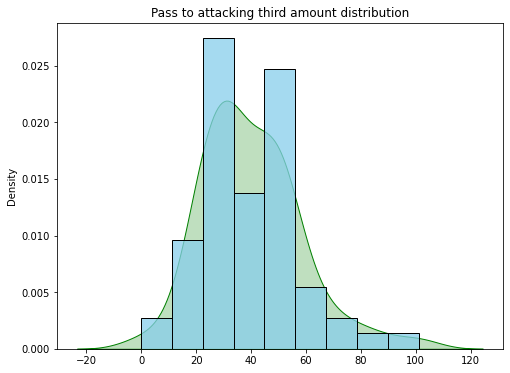

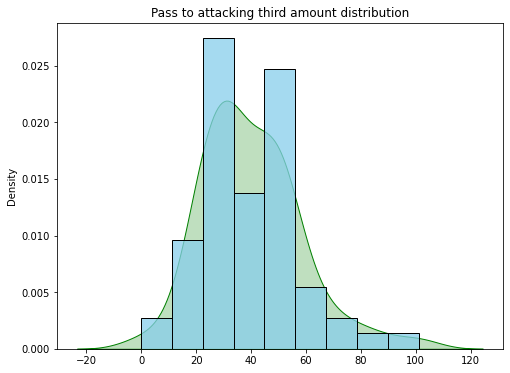

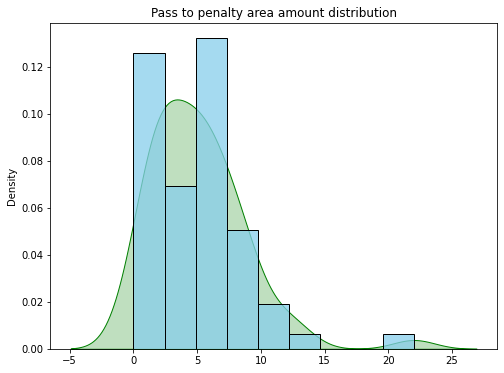

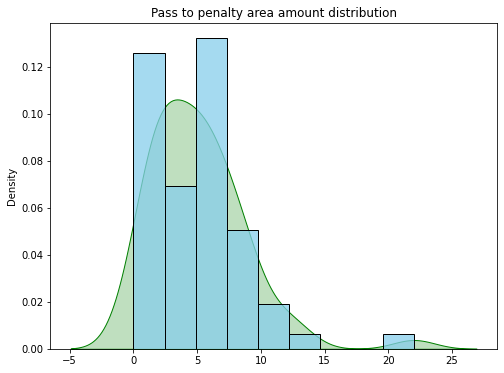

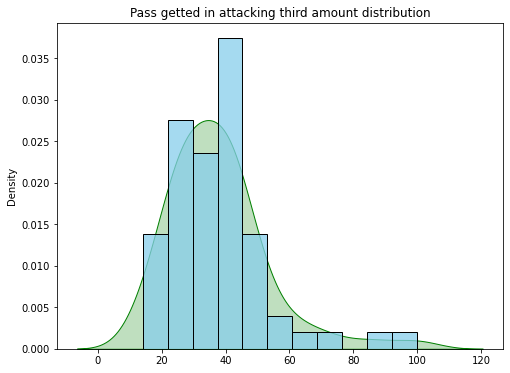

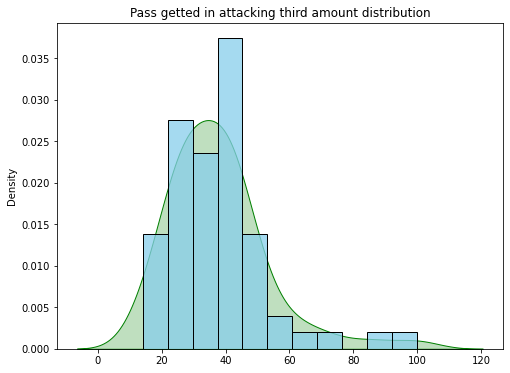

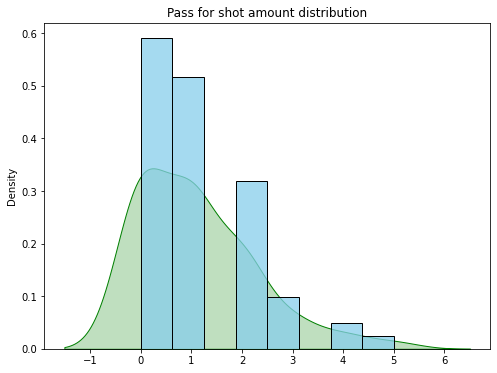

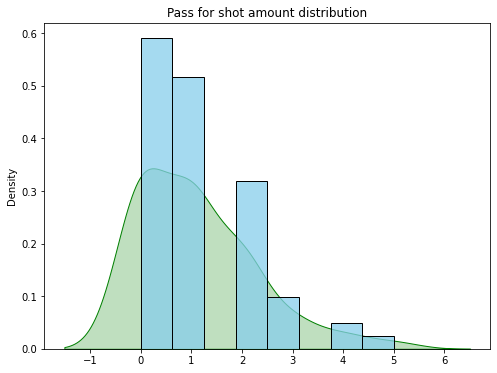

,player_name,ImpGen,ImpMatchAvg,PasFinTper90,PasFinTquant,PasPenAreaPer90,PasPenAreaQuant,PasGetFinTper90,PasGetFinTquant,PasForShotPer90,PasForShotQuant
0,Kevin De Bruyne,9.151851,9.269844,52,0.830769,9,0.923077,41,0.676923,3,0.953846
1,Paul Pogba,9.822094,10.257761,44,0.600000,3,0.384615,38,0.584615,1,0.692308


In [ ]:
data = {
    'player_name': [player, second_player], 
    'ImpGen': [player_importance_general(df, player), player_importance_general(df, second_player)],
    'ImpMatchAvg': [player_importance_match_average(df, player), player_importance_match_average(df, second_player)],
    'PasFinTper90': [player_passes_final_third_per90(df, player), player_passes_final_third_per90(df, second_player)], 
    'PasFinTquant': [player_passes_final_third_quantile(df, player), player_passes_final_third_quantile(df, second_player)],
    'PasPenAreaPer90': [player_passes_penalty_area_per90(df, player), player_passes_penalty_area_per90(df, second_player)],
    'PasPenAreaQuant': [player_passes_penalty_area_quantile(df, player), player_passes_penalty_area_quantile(df, second_player)],
    'PasGetFinTper90': [player_passes_getted_final_third_per90(df, player), player_passes_getted_final_third_per90(df, second_player)],
    'PasGetFinTquant': [player_passes_getted_final_third_quantile(df, player), player_passes_getted_final_third_quantile(df, second_player)],
    'PasForShotPer90': [player_passes_for_shot_per90(df, player), player_passes_for_shot_per90(df, second_player)],
    'PasForShotQuant': [player_passes_for_shot_quantile(df, player), player_passes_for_shot_quantile(df, second_player)]
}

metrics_df = pd.DataFrame(data)
metrics_df

Построим радар для сравнения двух игроков.

In [ ]:
!pip install soccerplots

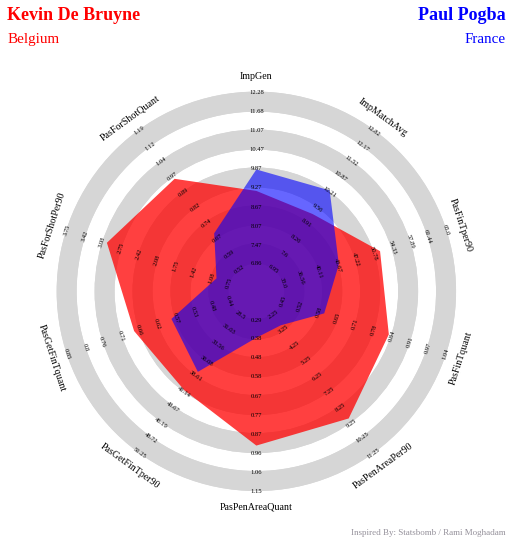

In [ ]:
from soccerplots.radar_chart import Radar

# отрисовка радара для двух игроков
def draw_radar(df, player, second_player):
    # получим все параметры
    params = list(df.columns)
    params = params[1:]
    params
    
    # будем добавлять диапазоны в списки пар
    ranges = []
    a_values = []
    b_values = []

    for x in params:
        a = min(df[params][x])
        a = a - (a*.25)
    
        b = max(df[params][x])
        b = b + (b*.25)
    
        ranges.append((a, b))
    
    for x in range(len(df['player_name'])):
        if df['player_name'][x] == player:
            a_values = df.iloc[x].values.tolist()
        
        if df['player_name'][x] == second_player:
            b_values = df.iloc[x].values.tolist()
        
    a_values = a_values[1:]
    b_values = b_values[1:]

    values = [a_values, b_values]
    
    # создание радара
    radar = Radar()
    fig, ax = radar.plot_radar(ranges=ranges, 
                               params=params, 
                               values=values, 
                               radar_color=['red', 'blue'], 
                               alphas=[.75, .6],
                               title=dict(
                                   title_name = player,
                                   title_color = 'red',
                                   subtitle_name = 'Belgium',
                                   subtitle_color = 'red',
                                   title_name_2 = second_player,
                                   title_color_2 = 'blue',
                                   subtitle_name_2 = 'France',
                                   subtitle_color_2 = 'blue',
                                   title_fontsize = 18,
                                   subtitle_fontsize = 15
                               ),
                               endnote='',
                               compare=True)

draw_radar(metrics_df, player, second_player)

# Задание 5

## Convex Hulls 

Вам нужно определить зону действий вашего футболиста 

1) Загляните в ноутбук с семинара Convex Hulls tutorial, и постройте график зоны действий игрока (ВАЖНО: выбираем тип действий передача и только координаты начала паса). Не забудьте отфильтровать выбросы с помощью Z score.


In [ ]:
# посчитаем квантиль отданных игроком пассов
player_pass_quantile = get_player_pass_quantile(df, player)
player_pass_quantile

0.9734660033167496

In [ ]:
!pip install mplsoccer

     |████████████████████████████████| 57 kB 2.2 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.0.5-py3-none-any.whl size=62946 sha256=43aad84f19692e8fada7f3092ab9432311b7b5abda2c5b07486249b0f3f30bf7
  Stored in directory: /root/.cache/pip/wheels/35/71/46/5f3df8e696517b395ed75971c4d09f5854310efc09d364a9ca
Successfully built mplsoccer


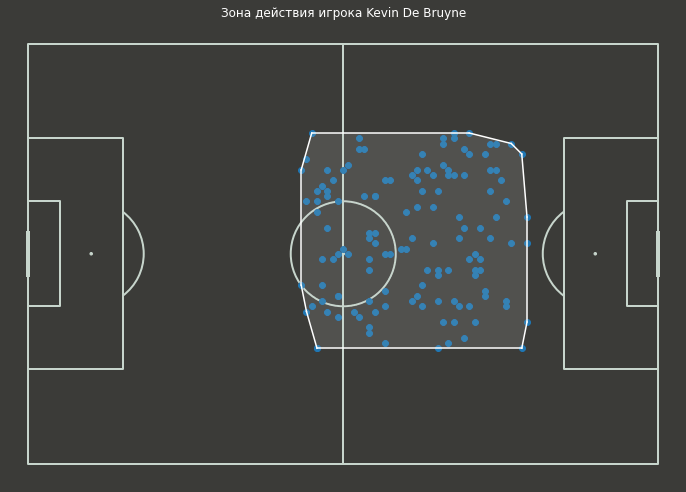

In [ ]:
from mplsoccer.pitch import Pitch
from scipy import stats
from scipy.spatial import ConvexHull

# визуализация зоны действия игрока
def player_action_area(df, player, player_pass_quantile, 
                    figsize=(13, 8.5), pitch_color='#3b3b38', line_color='#c7d5cc', 
                    marker_colors='#1f77b4', title_color='white'):
    # создание фигуры, на которой будет происходить отрисовка
    fig, ax = plt.subplots(figsize=figsize)
    fig.set_facecolor(pitch_color)
    ax.patch.set_facecolor(pitch_color)

    # футбольное поле
    pitch = Pitch(
        pitch_type='statsbomb', 
        orientation='horizontal',
        pitch_color=pitch_color,
        line_color=line_color, 
        figsize=figsize,
        constrained_layout=False, 
        tight_layout=True
    )
    
    # отрисовка футбольного поля
    pitch.draw(ax=ax)
    plt.gca().invert_yaxis()
    
    # координаты начала паса игрока
    df = df[(df['player_name'] == player) & (df['type_name'] == 'Pass')][['x', 'y']]
    
    # отфильтруем данные, чтобы исключить выбросы с помощью Z-Score
    df = df.where(np.abs(stats.zscore(df)) < player_pass_quantile).dropna()

    # массив групп координат x/y
    points = df.values

    # выпуклая оболочка
    hull = ConvexHull(df)

    # отрисовка координат начала паса
    plt.scatter(df.x, df.y, c=marker_colors)

    # цикл по каждому симплексу оболочки
    for i in hull.simplices:
        plt.plot(points[i, 0], points[i, 1], 'white')
        plt.fill(points[hull.vertices, 0], points[hull.vertices, 1], c='white', alpha=0.01)
        
    # устанавливаем назавние графику
    title = plt.title(f'Зона действия игрока {player}')
    plt.setp(title, color=title_color)

player_action_area(df, player, player_pass_quantile=player_pass_quantile)

# зона действий игрока в каждом из его матчей
# for match_id in set(df[df['player_name']==player]['match_id']):
#     player_action_area(df[df['match_id'] == match_id], player, player_pass_quantile=player_pass_quantile)

# Задание 6 (Бонус)

## Passing network

Вам нужно определить схему игры команды игрока на трех частях поля (оборона, центр поля, финальная треть поля)
1) Для этого создайте 3 датафрейма, разбив все пасы относительно положения мяча во время паса

2) Далее с помощью библиотеки mplsoccer (https://mplsoccer.readthedocs.io/en/latest/gallery/pitch_plots/plot_pass_network.html#sphx-glr-gallery-pitch-plots-plot-pass-network-py) нарисуйте три графика, которые визуализируют схему игры команды на трех частях поля
